In [15]:
import pandas as pd

In [16]:
# read pickle file
df = pd.read_pickle(r'data\MTA_Subway_Hourly_Ridership_2022.pkl')

In [17]:
df = pd.DataFrame(df)

In [18]:
df.head()
df.info()
debugging = True

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22514162 entries, 0 to 22514161
Data columns (total 12 columns):
 #   Column               Dtype         
---  ------               -----         
 0   transit_timestamp    datetime64[ns]
 1   transit_mode         object        
 2   station_complex_id   object        
 3   station_complex      object        
 4   borough              object        
 5   payment_method       object        
 6   fare_class_category  object        
 7   ridership            object        
 8   transfers            object        
 9   latitude             float64       
 10  longitude            float64       
 11  Georeference         object        
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 2.0+ GB


In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [20]:
# Cluster analysis
X = df[['ridership', 'transfers', 'latitude', 'longitude']]


In [21]:
# ust the max amount of physical cores not logical.  
import os
os.environ['LOKY_MAX_CPU_COUNT'] = '32'

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

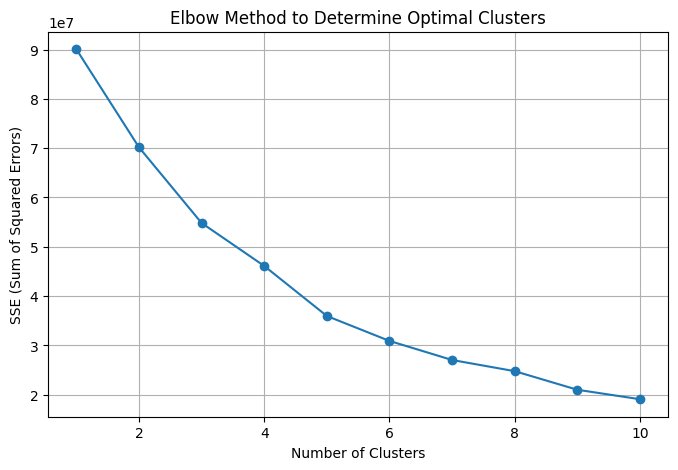

In [25]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.grid(True)
plt.show()

In [26]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

print(df)



           transit_timestamp transit_mode station_complex_id  \
0        2022-02-17 22:00:00       subway                 59   
1        2022-03-10 23:00:00       subway                404   
2        2022-10-05 21:00:00       subway                272   
3        2022-10-05 22:00:00       subway                420   
4        2022-10-05 10:00:00       subway                218   
...                      ...          ...                ...   
22514157 2022-02-06 20:00:00       subway                 99   
22514158 2022-02-06 12:00:00       subway                 95   
22514159 2022-12-28 22:00:00       subway                245   
22514160 2022-03-24 14:00:00       subway                217   
22514161 2022-03-24 09:00:00       subway                 75   

           station_complex    borough payment_method  \
0                 9 Av (D)   Brooklyn           omny   
1                28 St (6)  Manhattan           omny   
2              36 St (M,R)     Queens           omny   
3      

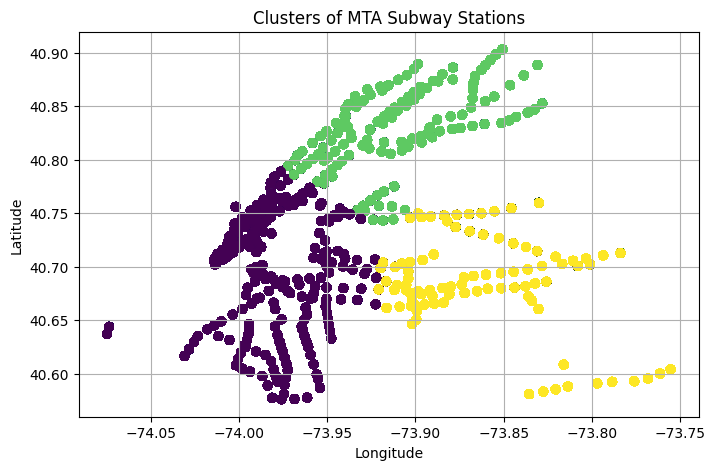

In [27]:
# visualize clusters
plt.figure(figsize=(8, 5))
plt.scatter(df['longitude'], df['latitude'], c=df['cluster'], cmap='viridis')
plt.title('Clusters of MTA Subway Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


In [28]:
df.head()

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference,cluster
0,2022-02-17 22:00:00,subway,59,9 Av (D),Brooklyn,omny,OMNY - Full Fare,4.0,0,40.646294,-73.99432,POINT (-73.99432 40.646294),0
1,2022-03-10 23:00:00,subway,404,28 St (6),Manhattan,omny,OMNY - Other,1.0,0,40.743070,-73.98426,POINT (-73.98426 40.74307),0
2,2022-10-05 21:00:00,subway,272,"36 St (M,R)",Queens,omny,OMNY - Full Fare,14.0,0,40.752040,-73.92878,POINT (-73.92878 40.75204),3
3,2022-10-05 22:00:00,subway,420,"219 St (2,5)",Bronx,omny,OMNY - Full Fare,5.0,0,40.883896,-73.86263,POINT (-73.86263 40.883896),3
4,2022-10-05 10:00:00,subway,218,"167 St (B,D)",Bronx,omny,OMNY - Full Fare,78.0,6,40.833770,-73.91844,POINT (-73.91844 40.83377),3
